# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split   
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor     
import xgboost as xgb
from sklearn.linear_model import LinearRegression     
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Overview of the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\omdes\Desktop\tcs\Dataset-main\insurance.csv')

print(df.head(15))
print(df.info())
print(df.isnull().sum())  

describe = df.describe()


    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130  


# Outlier Analysis

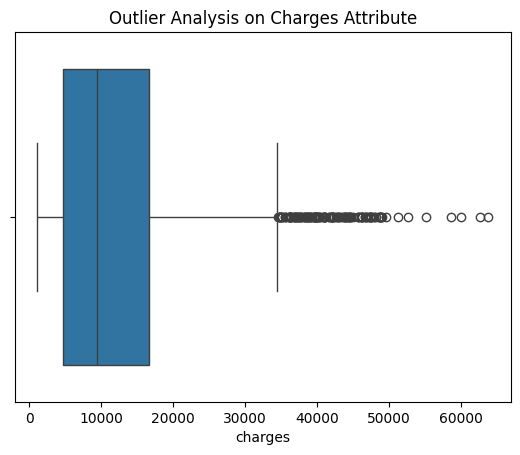

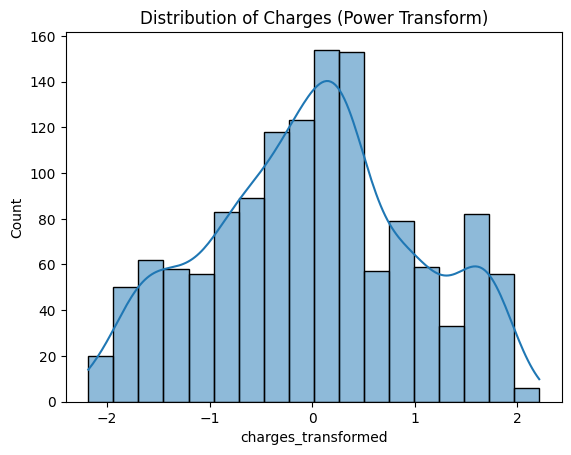

In [3]:
sns.boxplot(data=df, x='charges')
plt.title('Outlier Analysis on Charges Attribute')
plt.show()

# There are quite a few outliers in the Charges attribute.

# I used the power transformer method for outlier handling.
pt = PowerTransformer()
df['charges_transformed'] = pt.fit_transform(df[['charges']])

sns.histplot(df['charges_transformed'], kde=True)
plt.title('Distribution of Charges (Power Transform)')
plt.show()

# Visualize Data

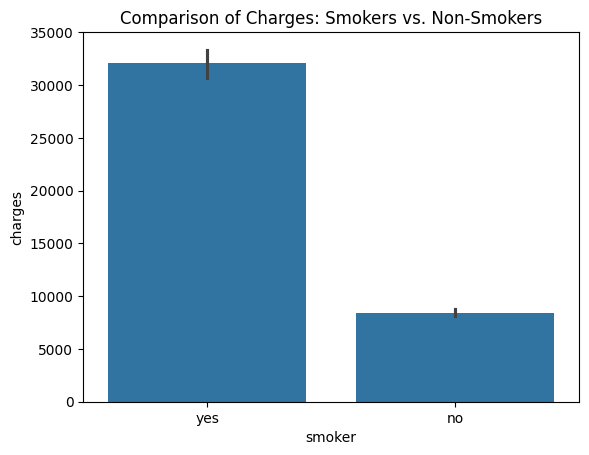

In [5]:
# Charges vs. Smoker Status
sns.barplot(data=df, x='smoker', y='charges')
plt.title('Comparison of Charges: Smokers vs. Non-Smokers')
plt.show()
# Smokers pay more for healthcare than non-smokers.

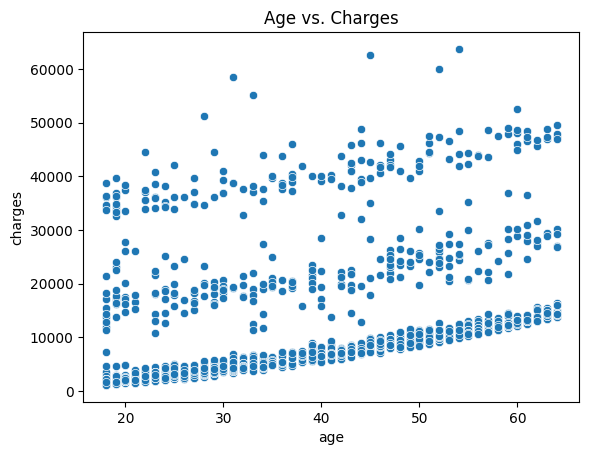

In [6]:
# Age vs. Charges
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.show()
# Although the age distribution is similar, we observe an upward trend in minimum expenditures as age increases.

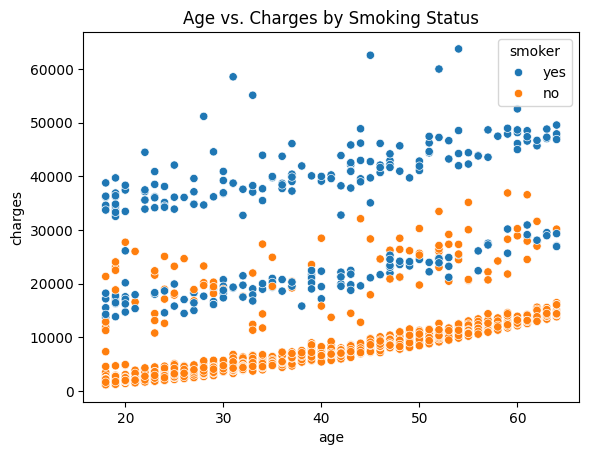

In [7]:
# Age vs. Charges by Smoking Status
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs. Charges by Smoking Status')
plt.show()
# It is noteworthy that smokers paid more throughout the graph.

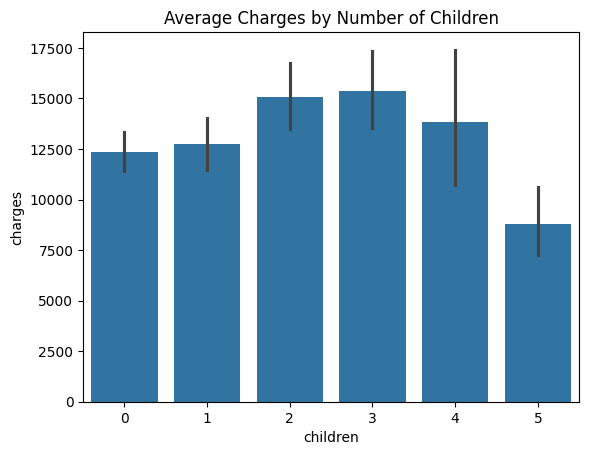

In [8]:
# Average Charges by Number of Children
sns.barplot(x='children', y='charges', data=df)
plt.title('Average Charges by Number of Children')
plt.show()

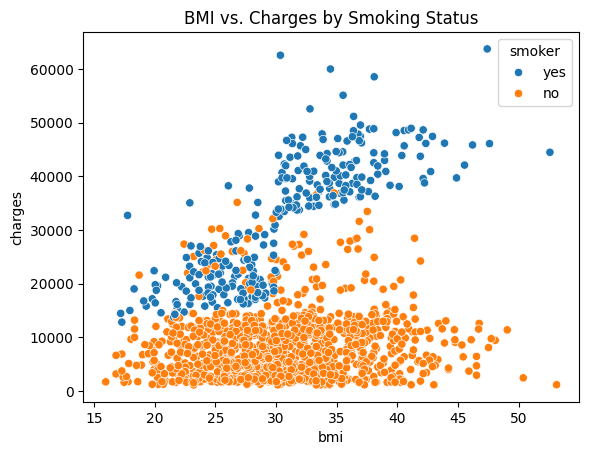

In [9]:
# BMI vs. Charges by Smoking Status
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs. Charges by Smoking Status')
plt.show()
# The same trend continues when BMI is considered.

# Encoding the Data

In [11]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

ohe = preprocessing.OneHotEncoder()

region = df.iloc[:,5:6].values
print(region)

region = ohe.fit_transform(region).toarray()
df['region'].unique()
df2 = pd.DataFrame(data = region, index = range(1338), columns=['southwest', 'southeast', 'northwest', 'northeast'])
print(df2)

df.drop('region', axis=1, inplace= True)

df = pd.concat([df,df2],axis=1)
print(df)

[['southwest']
 ['southeast']
 ['southeast']
 ...
 ['southeast']
 ['southwest']
 ['northwest']]
      southwest  southeast  northwest  northeast
0           0.0        0.0        0.0        1.0
1           0.0        0.0        1.0        0.0
2           0.0        0.0        1.0        0.0
3           0.0        1.0        0.0        0.0
4           0.0        1.0        0.0        0.0
...         ...        ...        ...        ...
1333        0.0        1.0        0.0        0.0
1334        1.0        0.0        0.0        0.0
1335        0.0        0.0        1.0        0.0
1336        0.0        0.0        0.0        1.0
1337        0.0        1.0        0.0        0.0

[1338 rows x 4 columns]
      age  sex     bmi  children  smoker      charges  charges_transformed  \
0      19    0  27.900         0       1  16884.92400             0.681663   
1      18    1  33.770         1       0   1725.55230            -1.748842   
2      28    1  33.000         3       0   4449.46200    

# Preparing Data for Modeling

In [12]:
x = df.drop('charges', axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Modeling

In [15]:
# Metric calculation function
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f'{model_name} Model Performance:')
    print(f'R² Score: {r2}')
    print(f'MAE (Mean Absolute Error): {mae}')
    print(f'MSE (Mean Squared Error): {mse}')
    print(f'RMSE (Root Mean Squared Error): {rmse}')
    print(f'MAPE (Mean Absolute Percentage Error): {mape}')
    print('-' * 50)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(),
}

# Evaluating model performance
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    evaluate_model(y_test, y_pred, model_name)

Linear Regression Model Performance:
R² Score: 0.9245874714106193
MAE (Mean Absolute Error): 2248.746338741641
MSE (Mean Squared Error): 11057309.810963953
RMSE (Root Mean Squared Error): 3325.2533453804617
MAPE (Mean Absolute Percentage Error): 0.2845825612124222
--------------------------------------------------
Decision Tree Model Performance:
R² Score: 0.999887679345043
MAE (Mean Absolute Error): 49.92154895771145
MSE (Mean Squared Error): 16468.93829529558
RMSE (Root Mean Squared Error): 128.33136130851094
MAPE (Mean Absolute Percentage Error): 0.0037469688965740267
--------------------------------------------------
Random Forest Model Performance:
R² Score: 0.9997034345386551
MAE (Mean Absolute Error): 36.9062834965164
MSE (Mean Squared Error): 43483.705515003116
RMSE (Root Mean Squared Error): 208.52746944947833
MAPE (Mean Absolute Percentage Error): 0.002437243582867388
--------------------------------------------------
XGBoost Model Performance:
R² Score: 0.9995530740364278
MA


# Visualizing R² scores of all models

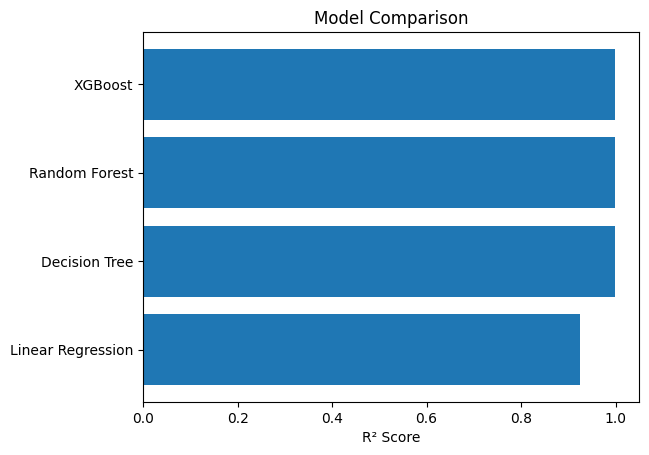

In [16]:
r2_scores = [r2_score(y_test, model.predict(x_test)) for model in models.values()]
plt.barh(list(models.keys()), r2_scores)
plt.xlabel('R² Score')
plt.title('Model Comparison')
plt.show()